# Polar Production from 2022 June 13th Data
Purpose: Clean analysis of june 13th data, adding descending results!

## Setting up Analysis Environment
* Importing libraries
* Setting standard plotting
* Creating folders for results, figures

In [1]:
from os import sys
import os
sys.path.append('../../')

# Getting packages #
%matplotlib widget

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import plotly.express as px

import main
import propellers
import motors
from aircraft import airplane
import cl_finders

# Setting Plot Defaults
plt.style.use('../../basic_plotter.mplstyle')

In [2]:
### Definining name of analysis ###
name = '2023-07-13_PolarResults_2022-06-13'
data_path = '../../data/'
data_folder = 'createv-2022-06-13'
file_name = 'june13_2022.BIN'
datasave_path = data_path+data_folder+'/'
result_path = '../Results/'+name+'/'
figure_path = '../Figures/'+name+'/'

In [3]:
### Creating Folders for Results/Data ###
if not os.path.exists(result_path):
    os.makedirs(result_path)
if not os.path.exists(figure_path):
    os.makedirs(figure_path)

## Importing Dataset

In [4]:
# Importing data, specifying import characteristics, backing up results
rate = "10ms"
interpolateM = "linear"
processor = "CREATeV_2022"

rawdata_name = data_folder+'/'+file_name.split('.')[0]+'_'+rate+'_'+interpolateM+'_'+processor+'.pkl'

# Checking if the data is already pickled for analysis
if os.path.exists(data_path+rawdata_name):
    df = pd.read_pickle(data_path+rawdata_name)
else:
    df = main.get_data(processor, data_folder+'/'+file_name, rate)
    df = df.interpolate(method=interpolateM)
    pd.to_pickle(df, data_path+rawdata_name) # Storing parsed data

## Defining Vehicle

In [5]:
# Vehicle parameters
prop = propellers.aeronaut20x8() # Using aeronaut 18.5 x 12 for this flight
motor = motors.U7V2_280KV()  # Using U7 V2 motor

mass = 12.727 # Estimated with virtual bolt included
span = 6.28
chord = 0.395
createv = airplane(mass, chord, span)

highorderpolar = True

## Parsing Data into Variables from DataFrame

In [6]:
cruise_data = cl_finders.data(prop, motor, createv)
cruise_data.add_cruise(df)
descent_data = cl_finders.data(prop, motor, createv)
descent_data.add_descent(df)

/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:27: RuntimeWarning: invalid value encountered in reciprocal
  self.rho = df["Pressure"].to_numpy() * (287 * (df["Ambient_Temperature"].to_numpy()+273.15))**-1             # Density found from barometer pressure & airspeed sensor temperatures
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:29: RuntimeWarning: invalid value encountered in reciprocal
  self.v_tas = self.v_eas * np.sqrt(1.225) * np.sqrt(self.rho)**-1   # the true airspeed
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:35: RuntimeWarning: invalid value encountered in reciprocal
  self.Vd_tas = self.Vd_eas * np.sqrt(1.225) * np.sqrt(self.rho)**-1   # the true airspeed
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performan

-0.0031044707175838793
Propeller Drag[nan nan nan ...  0.  0.  0.]


/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:157: RuntimeWarning: divide by zero encountered in reciprocal
  J_tas = v_tas * (n * propeller.diameter)**-1             # Advance ratio at TAS
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:157: RuntimeWarning: invalid value encountered in reciprocal
  J_tas = v_tas * (n * propeller.diameter)**-1             # Advance ratio at TAS
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:157: RuntimeWarning: invalid value encountered in multiply
  J_tas = v_tas * (n * propeller.diameter)**-1             # Advance ratio at TAS
/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:218: RuntimeWarning: divide by zero encountered in reciprocal
  CD = p_requi

## Plotting Time Series Data to Mask Data

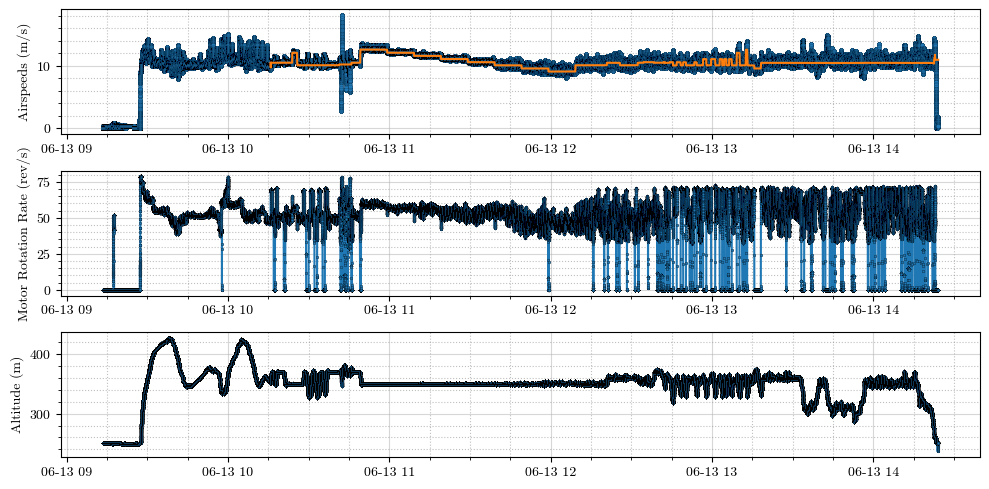

In [7]:
# Plotting true airspeed, with demanded airspeed
plt.figure(figsize=(10,5))
ax1 = plt.subplot(3,1,1)
ax1.plot(df.index, cruise_data.v_tas, label="Airspeed", marker='o', markeredgecolor=[0,0,0], markersize=3, markeredgewidth=0.1)
ax1.plot(df.index, cruise_data.v_dem, label="Demanded Airspeed", marker='', markeredgecolor=[0,0,0], markersize=3)
ax1.set_ylabel("Airspeeds (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
#plt.legend()

ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(df.index, cruise_data.n, label='ESC Measurement')
ax2.set_ylabel("Motor Rotation Rate (rev/s)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
#plt.legend()

ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(df.index, df.Altitude_POS, label='Altitude')
ax3.set_ylabel("Altitude (m)")
ax3.grid(which='major', linestyle='-')
ax3.grid(which='minor', linestyle=':', color='grey')
#plt.legend()

plt.show()

## Defining Cruise Time Segments

In [8]:
year=2022
month=6
day=13

seg_times = np.array([['10:49:25','10:59:07'],
                      ['10:59:12','11:09:07'],
                      ['11:09:12','11:19:08'],
                      ['11:19:12','11:29:08'],
                      ['11:29:12','11:39:08'],
                      ['11:39:12','11:49:08'],
                      ['11:49:12','11:59:08'],
                      ['11:59:12','12:09:08'],
                      ['12:09:30','12:15:49']])

cruise_masks = cl_finders.get_maskarray(df, seg_times, year, month, day)

## Defining Descent Time Segments

In [9]:
year=2022
month=6
day=13

seg_times = np.array([['12:44:20','12:45:26'],
                      ['12:46:51','12:48:18'],
                      ['12:49:16','12:50:18'],
                      ['12:53:24','12:54:15'],
                      ['12:56:41','12:57:50'],
                      ['12:59:41','13:01:10'],
                      ['13:02:52','13:03:44'],
                      ['13:04:32','13:05:17'],
                      ['13:06:22','13:07:17'],
                      ['13:09:14','13:10:11'],
                      ['13:15:44','13:18:07'],
                      ])

descent_masks = cl_finders.get_maskarray(df, seg_times, year, month, day)

## Plotting Cruising Segments

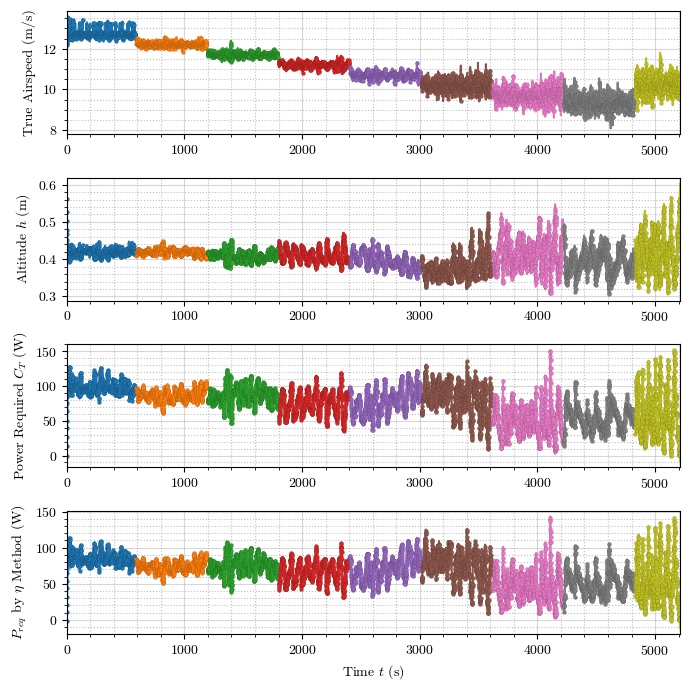

In [10]:
# Plotting Steady-level Data Runs #
markerstyle = 'o'
markerevery = 80
markedgew = 0.05
plt.figure(figsize=(7,7))
ax1 = plt.subplot(4,1,1)
t_init = 0
for i in range(len(cruise_masks)):
    time_s = np.linspace(t_init, (len(cruise_data.v_tas[cruise_masks[i]])-1)/100 + t_init, len(cruise_data.v_tas[cruise_masks[i]]))
    ax1.plot(time_s, cruise_data.v_tas[cruise_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax1.set_ylabel("True Airspeed (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

ax0 = plt.subplot(4,1,2, sharex=ax1)
t_init = 0
for i in range(len(cruise_masks)):
    time_s = np.linspace(t_init, (len(cruise_data.v_tas[cruise_masks[i]])-1)/100 + t_init, len(cruise_data.v_tas[cruise_masks[i]]))
    ax0.plot(time_s, cruise_data.J[cruise_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax0.set_ylabel("Altitude $h$ (m)")
ax0.grid(which='major', linestyle='-')
ax0.grid(which='minor', linestyle=':', color='grey')
ax0.autoscale(enable=True, axis='x', tight=True)

ax2 = plt.subplot(4,1,3, sharex=ax1)
t_init = 0
for i in range(len(cruise_masks)):
    time_s = np.linspace(t_init, (len(cruise_data.v_tas[cruise_masks[i]])-1)/100 + t_init, len(cruise_data.v_tas[cruise_masks[i]]))
    ax2.plot(time_s, cruise_data.P_ct[cruise_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax2.set_ylabel("Power Required $C_T$ (W)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.autoscale(enable=True, axis='x', tight=True)

ax3 = plt.subplot(4,1,4, sharex=ax1)
t_init = 0
for i in range(len(cruise_masks)):
    time_s = np.linspace(t_init, (len(cruise_data.v_tas[cruise_masks[i]])-1)/100 + t_init, len(cruise_data.v_tas[cruise_masks[i]]))
    ax3.plot(time_s, cruise_data.P_eta[cruise_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax3.set_ylabel("$P_{req}$ by $\eta$ Method (W)")
ax3.set_xlabel("Time $t$ (s)")
ax3.grid(which='major', linestyle='-')
ax3.grid(which='minor', linestyle=':', color='grey')
ax3.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()
# plt.savefig("Figures/cruise_overview_pres.pdf", bbox_inches='tight')

## Plotting Descent Segments

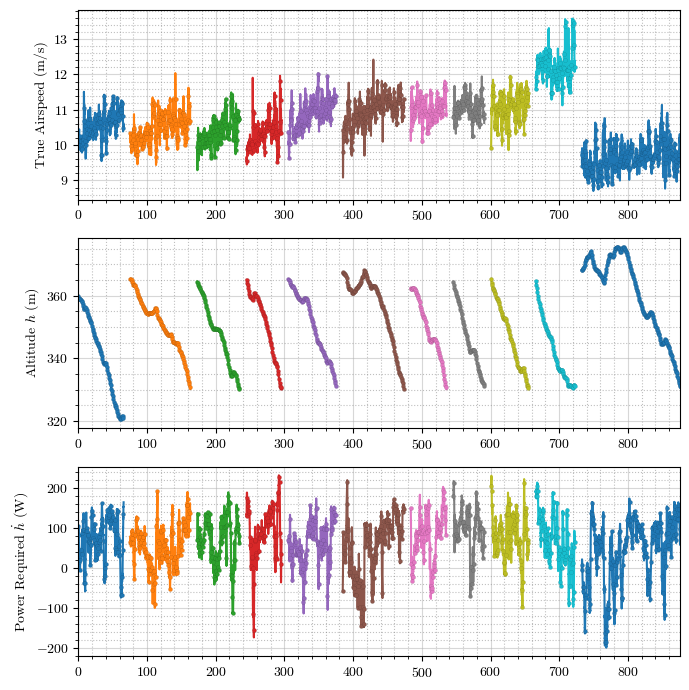

In [11]:
# Plotting Steady-level Data Runs #
markerstyle = 'o'
markerevery = 80
markedgew = 0.05
plt.figure(figsize=(7,7))
ax1 = plt.subplot(3,1,1)
t_init = 0
for i in range(len(descent_masks)):
    time_s = np.linspace(t_init, (len(descent_data.v_tas[descent_masks[i]])-1)/100 + t_init, len(descent_data.v_tas[descent_masks[i]]))
    ax1.plot(time_s, descent_data.v_tas[descent_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax1.set_ylabel("True Airspeed (m/s)")
ax1.grid(which='major', linestyle='-')
ax1.grid(which='minor', linestyle=':', color='grey')
ax1.autoscale(enable=True, axis='x', tight=True)

ax0 = plt.subplot(3,1,2, sharex=ax1)
t_init = 0
for i in range(len(descent_masks)):
    time_s = np.linspace(t_init, (len(descent_data.v_tas[descent_masks[i]])-1)/100 + t_init, len(descent_data.v_tas[descent_masks[i]]))
    ax0.plot(time_s, descent_data.h[descent_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax0.set_ylabel("Altitude $h$ (m)")
ax0.grid(which='major', linestyle='-')
ax0.grid(which='minor', linestyle=':', color='grey')
ax0.autoscale(enable=True, axis='x', tight=True)

ax2 = plt.subplot(3,1,3, sharex=ax1)
t_init = 0
for i in range(len(descent_masks)):
    time_s = np.linspace(t_init, (len(descent_data.v_tas[descent_masks[i]])-1)/100 + t_init, len(descent_data.v_tas[descent_masks[i]]))
    ax2.plot(time_s, descent_data.P_desc[descent_masks[i]], marker=markerstyle, markeredgecolor=[0,0,0], markersize=3, markevery=markerevery, markeredgewidth=markedgew)
    t_init = time_s[-1]+10
ax2.set_ylabel("Power Required $\dot{h}$ (W)")
ax2.grid(which='major', linestyle='-')
ax2.grid(which='minor', linestyle=':', color='grey')
ax2.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()
# plt.savefig("Figures/cruise_overview_pres.pdf", bbox_inches='tight')

## Collecting $C_L$, $C_D$

In [12]:
# Totalling up CL, CD for Cruise
cl_total_cruise = cl_finders.total_segments_boolean(cruise_data.CL, cruise_masks)
cd_total_eta = cl_finders.total_segments_boolean(cruise_data.Cd_eta, cruise_masks)
cd_total_ct = cl_finders.total_segments_boolean(cruise_data.Cd_ct, cruise_masks)

# Totalling up CL, CD for Descents
cl_total_desc = cl_finders.total_segments_boolean(descent_data.CL, descent_masks)
cd_total_desc = cl_finders.total_segments_boolean(descent_data.Cd_desc, descent_masks)

## Forming Averages for Manual Segments

In [13]:
[cl_means_eta, cl_stds_eta, cl_ci95s_eta, cd_means_eta, cd_stds_eta, cd_ci95s_eta] = cl_finders.collect_segments(cruise_masks, cruise_data.CL, cruise_data.Cd_eta)
[cl_means_ct, cl_stds_ct, cl_ci95s_ct, cd_means_ct, cd_stds_ct, cd_ci95s_ct] = cl_finders.collect_segments(cruise_masks, cruise_data.CL, cruise_data.Cd_ct)
[cl_means_desc, cl_stds_desc, cl_ci95s_desc, cd_means_desc, cd_stds_desc, cd_ci95s_desc] = cl_finders.collect_segments(descent_masks, descent_data.CL, descent_data.Cd_desc)

## Forming Averages for Automatic Binning

In [14]:
bins = np.linspace(0.05, 1.4, 51)

[cl_means_eta_bin, cl_stds_eta_bin, cl_ci95s_eta_bin, cd_means_eta_bin, cd_stds_eta_bin, cd_ci95s_eta_bin] = cl_finders.collect_bins(bins, cl_total_cruise, cd_total_eta)
[cl_means_ct_bin, cl_stds_ct_bin, cl_ci95s_ct_bin, cd_means_ct_bin, cd_stds_ct_bin, cd_ci95s_ct_bin] = cl_finders.collect_bins(bins, cl_total_cruise, cd_total_ct)
[cl_means_desc_bin, cl_stds_desc_bin, cl_ci95s_desc_bin, cd_means_desc_bin, cd_stds_desc_bin, cd_ci95s_desc_bin] = cl_finders.collect_bins(bins, cl_total_desc, cd_total_desc)

/Users/williamkemp/Records/Repositories/CREATeV_AnalysisSuite/Investigations/Performance_Investigations/../../cl_finders.py:385: RuntimeWarning: Mean of empty slice.
  cl_means = [total_lift_coeffs[digitized == i].mean() for i in range(1, len(bins))]
/Users/williamkemp/opt/anaconda3/envs/superwake-records/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/williamkemp/opt/anaconda3/envs/superwake-records/lib/python3.10/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/williamkemp/opt/anaconda3/envs/superwake-records/lib/python3.10/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/williamkemp/opt/anaconda3/envs/superwake-records/lib/python3.10/sit

## Performing Curve Fitting on Manual Segments

In [15]:
# Finding drag polar:
polar_eta = cl_finders.cd2polar(createv, cd_means_eta, cl_means_eta,highorder=highorderpolar)
polar_ct = cl_finders.cd2polar(createv, cd_means_ct, cl_means_ct, highorder=highorderpolar)
polar_desc = cl_finders.cd2polar(createv, cd_means_desc, cl_means_desc, highorder=highorderpolar)

# Finding power required @ SSL @ Standard weight of 12.6 kg
Peq_eta, EAS = cl_finders.polar2preqew(createv, polar_eta, (8,14))
Peq_ct, EAS = cl_finders.polar2preqew(createv, polar_ct, (8,14))
Peq_desc, EAS = cl_finders.polar2preqew(createv, polar_desc, (8,14))

## Performing Curve Fitting on Binned Results

In [16]:
# Finding drag polar:
polar_eta_bin = cl_finders.cd2polar(createv, cd_means_eta_bin, cl_means_eta_bin,highorder=highorderpolar)
polar_ct_bin = cl_finders.cd2polar(createv, cd_means_ct_bin, cl_means_ct_bin, highorder=highorderpolar)
polar_desc_bin = cl_finders.cd2polar(createv, cd_means_desc_bin, cl_means_desc_bin, highorder=highorderpolar)

# Finding power required @ SSL @ Standard weight of 12.6 kg
Peq_eta_bin, EAS_bin = cl_finders.polar2preqew(createv, polar_eta_bin, (8,14))
Peq_ct_bin, EAS_bin = cl_finders.polar2preqew(createv, polar_ct_bin, (8,14))
Peq_desc_bin, EAS_bin = cl_finders.polar2preqew(createv, polar_desc_bin, (8,14))

## Packing Results

In [17]:
eta_cruise_segresult = cl_finders.packaging_binresults(cl_total_cruise, cl_means_eta, cl_stds_eta, cl_ci95s_eta, cd_total_eta, cd_means_eta, cd_stds_eta, cd_ci95s_eta, polar_eta, createv)
ct_cruise_segresult = cl_finders.packaging_binresults(cl_total_cruise, cl_means_ct, cl_stds_ct, cl_ci95s_ct, cd_total_ct, cd_means_ct, cd_stds_ct, cd_ci95s_ct, polar_ct, createv)

descent_segresult = cl_finders.packaging_binresults(cl_total_desc, cl_means_desc, cl_stds_desc, cl_ci95s_desc, cd_total_desc, cd_means_desc, cd_stds_desc, cd_ci95s_desc, polar_desc, createv)

In [18]:
eta_cruise_binresult = cl_finders.packaging_binresults(cl_total_cruise, cl_means_eta_bin, cl_stds_eta_bin, cl_ci95s_eta_bin, cd_total_eta, cd_means_eta_bin, cd_stds_eta_bin, cd_ci95s_eta_bin, polar_eta_bin, createv)
ct_cruise_binresult = cl_finders.packaging_binresults(cl_total_cruise, cl_means_ct_bin, cl_stds_ct_bin, cl_ci95s_ct_bin, cd_total_ct, cd_means_ct_bin, cd_stds_ct_bin, cd_ci95s_ct_bin, polar_ct_bin, createv)

descent_binresult = cl_finders.packaging_binresults(cl_total_desc, cl_means_desc_bin, cl_stds_desc_bin, cl_ci95s_desc_bin, cd_total_desc, cd_means_desc_bin, cd_stds_desc_bin, cd_ci95s_desc_bin, polar_desc_bin, createv)

## Saving Results

In [19]:
# Saving results to their pickles
pd.to_pickle(eta_cruise_segresult, result_path+'eta_cruise_segresult.pkl')
pd.to_pickle(ct_cruise_segresult, result_path+'ct_cruise_segresult.pkl')
pd.to_pickle(descent_segresult, result_path+'descent_segresult.pkl')

pd.to_pickle(eta_cruise_binresult, result_path+'eta_cruise_binresult.pkl')
pd.to_pickle(ct_cruise_binresult, result_path+'ct_cruise_binresult.pkl')
pd.to_pickle(descent_binresult, result_path+'descent_binresult.pkl')

## Generating Plots of All Results

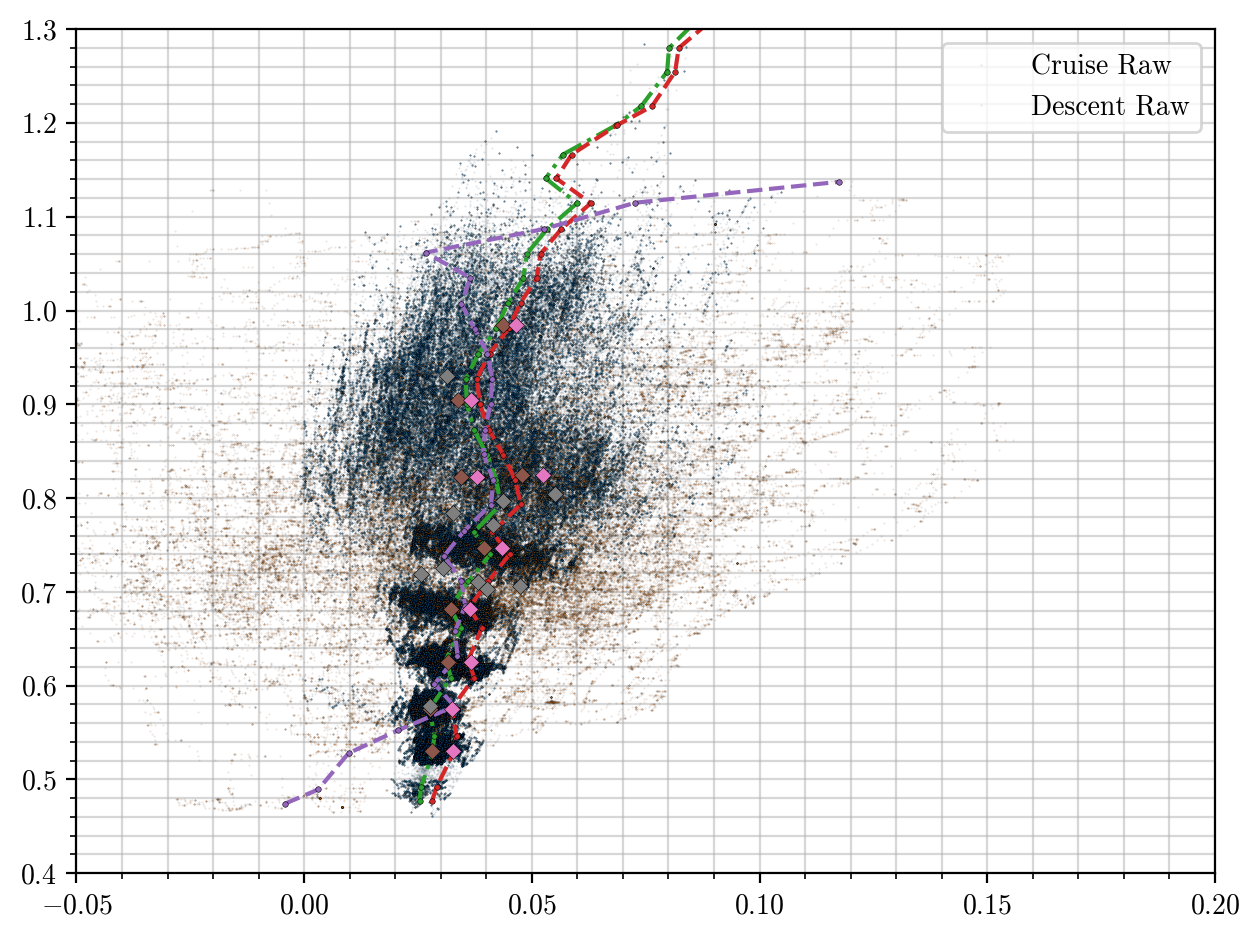

In [20]:
plt.figure(dpi=200)
plt.plot(eta_cruise_binresult.raw_polar.CD, eta_cruise_binresult.raw_polar.CL, marker='.', markersize=1, linestyle='', alpha=0.1, label='Cruise Raw')
plt.plot(descent_binresult.raw_polar.CD, descent_binresult.raw_polar.CL, marker='.', markersize=1, linestyle='', alpha=0.1, label='Descent Raw')
plt.errorbar(eta_cruise_binresult.ave_polar.CD, eta_cruise_binresult.ave_polar.CL, xerr=eta_cruise_binresult.ci95_polar.CD, yerr=eta_cruise_binresult.ci95_polar.CL, linestyle='-.')
plt.errorbar(ct_cruise_binresult.ave_polar.CD, ct_cruise_binresult.ave_polar.CL, linestyle='--')
plt.errorbar(descent_binresult.ave_polar.CD, descent_binresult.ave_polar.CL, linestyle='--')

plt.errorbar(eta_cruise_segresult.ave_polar.CD, eta_cruise_segresult.ave_polar.CL, xerr=eta_cruise_segresult.ci95_polar.CD, yerr=eta_cruise_segresult.ci95_polar.CL, linestyle='', marker='D')
plt.errorbar(ct_cruise_segresult.ave_polar.CD, ct_cruise_segresult.ave_polar.CL, xerr=ct_cruise_segresult.ci95_polar.CD, yerr=ct_cruise_segresult.ci95_polar.CL, linestyle='', marker='D')
plt.errorbar(descent_segresult.ave_polar.CD, descent_segresult.ave_polar.CL, xerr=descent_segresult.ci95_polar.CD, yerr=descent_segresult.ci95_polar.CL, linestyle='', marker='D')

plt.xlim([-0.05, 0.2])
plt.ylim([0.4, 1.3])
plt.legend()
plt.show()